In [1]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from transformers import pipeline
from googletrans import Translator
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from deep_translator import GoogleTranslator
import time
import torch

In [2]:
# Step 1: Uninstall conflicting versions of torch, torchvision, and torchaudio
!pip uninstall torch torchaudio torchvision -y

# Step 2: Install compatible versions of torch, torchvision, and torchaudio
!pip install torch==2.5.0 torchvision==0.20.0 torchaudio==2.5.0 transformers



Found existing installation: torch 2.5.0
Uninstalling torch-2.5.0:
  Successfully uninstalled torch-2.5.0
Found existing installation: torchaudio 2.5.0
Uninstalling torchaudio-2.5.0:
  Successfully uninstalled torchaudio-2.5.0
Found existing installation: torchvision 0.20.0
Uninstalling torchvision-0.20.0:
  Successfully uninstalled torchvision-0.20.0


You can safely remove it manually.
You can safely remove it manually.


  Using cached torch-2.5.0-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.20.0-cp311-cp311-win_amd64.whl.metadata (6.2 kB)
  Using cached torchaudio-2.5.0-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
Using cached torch-2.5.0-cp311-cp311-win_amd64.whl (203.1 MB)
Using cached torchvision-0.20.0-cp311-cp311-win_amd64.whl (1.6 MB)
Using cached torchaudio-2.5.0-cp311-cp311-win_amd64.whl (2.4 MB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('test_4.csv')

In [4]:
df = df.head()

In [5]:
df.shape

(5, 6)

In [6]:
df.describe

<bound method NDFrame.describe of                                        DealerComment      Component  \
0  * ******************************SKARGA********...       BEARINGS   
1  ******************************REKL************...    RAIN SENSOR   
2  ******************************Klgomål*********...      EGR VALVE   
3  ******************************REKL************...  BRAKE CALIPER   
4  ******************************INCIDENT********...        SLEEVES   

                Failure   DefectivePart  PartsReplaced         Cost  
0                 NOISE  WHEEL BEARINGS            5.0   299.776842  
1  INCORRECT ADJUSTMENT          SENSOR            1.0    67.360000  
2           WATER LEAKS       EGR VALVE            1.0  1106.880000  
3              BLOCKAGE    BRAKE SADDLE            1.5   443.450000  
4                 BREAK   RUBBER SLEEVE            1.0   153.130000  >

In [7]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DealerComment  5 non-null      object 
 1   Component      5 non-null      object 
 2   Failure        5 non-null      object 
 3   DefectivePart  5 non-null      object 
 4   PartsReplaced  5 non-null      float64
 5   Cost           5 non-null      float64
dtypes: float64(2), object(4)
memory usage: 372.0+ bytes


In [8]:
#to check columns
df.columns

Index(['DealerComment', 'Component', 'Failure', 'DefectivePart',
       'PartsReplaced', 'Cost'],
      dtype='object')

In [9]:
#Read the data set
!pip install google_trans_new
!pip install deep-translator
import pandas as pd



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#tranlating the english column in dealer_comment

# Initialize the translator
translator = GoogleTranslator(source='auto', target='en')

# Function to translate text
def translate_text(text):
    try:
        translated_text = translator.translate(text)
        time.sleep(0.5)  # Adding a delay to avoid rate limiting
        return translated_text
    except Exception as e:
        print(f"Error translating text: {text}\nError: {e}")
        return text  # Return original text if translation fails

# Ensure you're using the correct column name for DealerComment (case-sensitive)
if 'DealerComment' in df.columns:  # Use correct case for the column
    df['Translated_DealerComment'] = df['DealerComment'].apply(translate_text)
else:
    print("The 'DealerComment' column does not exist. Please check the column names.")

# Optionally, save the translated DataFrame to a new CSV file
df.to_csv('train_17_translated.csv', index=False)


In [11]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment
0,* ******************************SKARGA********...,BEARINGS,NOISE,WHEEL BEARINGS,5.0,299.776842,* ******************************COMPLAINT*****...
1,******************************REKL************...,RAIN SENSOR,INCORRECT ADJUSTMENT,SENSOR,1.0,67.360000,******************************RECL************...
2,******************************Klgomål*********...,EGR VALVE,WATER LEAKS,EGR VALVE,1.0,1106.880000,******************************Goals***********...
3,******************************REKL************...,BRAKE CALIPER,BLOCKAGE,BRAKE SADDLE,1.5,443.450000,******************************RECORD**********...
4,******************************INCIDENT********...,SLEEVES,BREAK,RUBBER SLEEVE,1.0,153.130000,******************************INCIDENT********...


In [12]:
import re

# Function to clean the text (remove only asterisks)
def clean_text(text):
    if isinstance(text, str):
        # Remove asterisks (*) only
        cleaned = re.sub(r'\*', '', text)
        # Remove extra spaces
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()
        return cleaned
    return text

# Apply the cleaning function to the 'Translated_DealerComment' column
df['Cleaned_DealerComment'] = df['Translated_DealerComment'].apply(clean_text)


In [13]:
df['DealerComment'] = df['DealerComment'].str.replace('*', '', regex=False).str.replace('_', ' ', regex=False)

In [14]:
df['Translated_DealerComment'] = df['Translated_DealerComment'].str.replace('*', '', regex=False).str.replace('_', ' ', regex=False)

In [15]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment,Cleaned_DealerComment
0,SKARGA HALAS Z PRZODU POJAZDU PODCZAS JAZDY ...,BEARINGS,NOISE,WHEEL BEARINGS,5.0,299.776842,COMPLAINT NOISE FROM THE FRONT OF THE VEHICLE...,COMPLAINT NOISE FROM THE FRONT OF THE VEHICLE ...
1,REKL Fehler Regensenor GRUND Regensensor defek...,RAIN SENSOR,INCORRECT ADJUSTMENT,SENSOR,1.0,67.360000,RECL Rain sensor error REASON Rain sensor defe...,RECL Rain sensor error REASON Rain sensor defe...
2,Klgomål FELSÖKNING: BILEN DRAR KYLARVÄTSKA Ors...,EGR VALVE,WATER LEAKS,EGR VALVE,1.0,1106.880000,Goals TROUBLESHOOTING: THE CAR DRAWS COOLANT ...,Goals TROUBLESHOOTING: THE CAR DRAWS COOLANT R...
3,REKL Vorderachsbremse rechts wird heiss. GRUND...,BRAKE CALIPER,BLOCKAGE,BRAKE SADDLE,1.5,443.450000,RECORD Right front axle brake gets hot. REASON...,RECORD Right front axle brake gets hot. REASON...
4,INCIDENT PERTE PUISSANCE \nBRUIT A L ACCELERAT...,SLEEVES,BREAK,RUBBER SLEEVE,1.0,153.130000,INCIDENT LOSS OF POWER\nNOISE DURING ACCELERAT...,INCIDENT LOSS OF POWER NOISE DURING ACCELERATI...


In [16]:
# Initialize zero-shot classification pipeline with RoBERTa
classifier = pipeline("zero-shot-classification", model="Jiva/xlm-roberta-large-it-mnli")

general_categories = [
    "DEFECTIVE_COMPONENT",
    "DEFECTIVE_PART",
    "FAILURE_TYPE",
    "NUM_PARTS_REPLACED",
    "COST"
]

# Initialize dictionary to store classification results for each category
general_results = {category: [] for category in general_categories}
max_length = 512

# Loop through each row in the DataFrame
for idx, row in df.iterrows():
    text = row['Translated_DealerComment']

    for category in general_categories:
        result = classifier(text, candidate_labels=[category], max_length=max_length)
        # Append a tuple with the label and score for each category
        general_results[category].append((result['labels'][0], result['scores'][0]))

# Convert the results into DataFrame columns
for category in general_categories:
    df[f'{category}_label'] = [result[0] for result in general_results[category]]
    df[f'{category}_score'] = [result[1] for result in general_results[category]]


In [17]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def apply_threshold(score, threshold=0.5):
    return 1 if score >= threshold else 0

# Apply threshold to convert scores into binary labels
df['DEFECTIVE_COMPONENT_label_binary'] = df['DEFECTIVE_COMPONENT_score'].apply(apply_threshold)
df['DEFECTIVE_PART_label_binary'] = df['DEFECTIVE_PART_score'].apply(apply_threshold)
df['FAILURE_TYPE_label_binary'] = df['FAILURE_TYPE_score'].apply(apply_threshold)
df['NUM_PARTS_REPLACED_label_binary'] = df['NUM_PARTS_REPLACED_score'].apply(apply_threshold)
df['COST_label_binary'] = df['COST_score'].apply(apply_threshold)

# Convert true labels into binary format for comparison
df['DEFECTIVE_COMPONENT_TRUE'] = df['DEFECTIVE_COMPONENT_label'].apply(lambda x: 1 if x == 'DEFECTIVE_COMPONENT' else 0)
df['DEFECTIVE_PART_TRUE'] = df['DEFECTIVE_PART_label'].apply(lambda x: 1 if x == 'DEFECTIVE_PART' else 0)
df['FAILURE_TYPE_TRUE'] = df['FAILURE_TYPE_label'].apply(lambda x: 1 if x == 'FAILURE_TYPE' else 0)
df['NUM_PARTS_REPLACED_TRUE'] = df['NUM_PARTS_REPLACED_label'].apply(lambda x: 1 if x == 'NUM_PARTS_REPLACED' else 0)
df['COST_TRUE'] = df['COST_label'].apply(lambda x: 1 if x == 'COST' else 0)

# Define a function to calculate metrics
def calculate_metrics(true_labels, predicted_labels):
    return {
        'accuracy': accuracy_score(true_labels, predicted_labels),
        'precision': precision_score(true_labels, predicted_labels, average='macro', zero_division=1),
        'recall': recall_score(true_labels, predicted_labels, average='macro', zero_division=1),
        'f1': f1_score(true_labels, predicted_labels, average='macro', zero_division=1)
    }

# Calculate metrics for each category
metrics = {}
metrics['DEFECTIVE_COMPONENT'] = calculate_metrics(df['DEFECTIVE_COMPONENT_TRUE'], df['DEFECTIVE_COMPONENT_label_binary'])
metrics['DEFECTIVE_PART'] = calculate_metrics(df['DEFECTIVE_PART_TRUE'], df['DEFECTIVE_PART_label_binary'])
metrics['FAILURE_TYPE'] = calculate_metrics(df['FAILURE_TYPE_TRUE'], df['FAILURE_TYPE_label_binary'])
metrics['NUM_PARTS_REPLACED'] = calculate_metrics(df['NUM_PARTS_REPLACED_TRUE'], df['NUM_PARTS_REPLACED_label_binary'])
metrics['COST'] = calculate_metrics(df['COST_TRUE'], df['COST_label_binary'])

for category, result in metrics.items():
    print(f"Metrics for {category}:")
    for metric, value in result.items():
        print(f"{metric}: {value}")
    print()

metrics_df = pd.DataFrame(metrics).T
metrics_df.reset_index(inplace=True)
metrics_df.columns = ['Category', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
print(metrics_df)


Metrics for DEFECTIVE_COMPONENT:
accuracy: 0.6
precision: 0.5
recall: 0.8
f1: 0.375

Metrics for DEFECTIVE_PART:
accuracy: 0.6
precision: 0.5
recall: 0.8
f1: 0.375

Metrics for FAILURE_TYPE:
accuracy: 0.0
precision: 0.5
recall: 0.5
f1: 0.0

Metrics for NUM_PARTS_REPLACED:
accuracy: 0.4
precision: 0.5
recall: 0.7
f1: 0.2857142857142857

Metrics for COST:
accuracy: 0.2
precision: 0.5
recall: 0.6
f1: 0.16666666666666666

              Category  Accuracy  Precision  Recall  F1-Score
0  DEFECTIVE_COMPONENT       0.6        0.5     0.8  0.375000
1       DEFECTIVE_PART       0.6        0.5     0.8  0.375000
2         FAILURE_TYPE       0.0        0.5     0.5  0.000000
3   NUM_PARTS_REPLACED       0.4        0.5     0.7  0.285714
4                 COST       0.2        0.5     0.6  0.166667


In [18]:
df.to_csv('output_test_4.csv', index=False)

In [19]:
# Initialize the zero-shot classification using pipeline
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="Jiva/xlm-roberta-large-it-mnli")
cause_labels = ['Human_Error','Design_Flaws','Material_Issue']


In [20]:
def classify_cause(text):
    result = classifier(text, cause_labels)
    return result['labels'][0]

In [21]:
df['Cause_of_Failure'] = df['Translated_DealerComment'].apply(classify_cause)

In [22]:
for cause in cause_labels:
    df[cause] = df['Cause_of_Failure'].apply(lambda x: 1 if x == cause else 0)
    print(cause)

Human_Error
Design_Flaws
Material_Issue


In [23]:
cause_distribution = df['Cause_of_Failure'].value_counts(normalize=True)
print("\nDistribution of Components_Failure:")
print(cause_distribution)


Distribution of Components_Failure:
Cause_of_Failure
Material_Issue    0.8
Design_Flaws      0.2
Name: proportion, dtype: float64


In [24]:
df.to_csv("cause_of_failure_results.csv",index=False)

In [25]:
components = df['Component'].dropna().unique().tolist()
defective_parts = df['DefectivePart'].dropna().unique().tolist()
failure_types = df['Failure'].dropna().unique().tolist()
parts_replaced = df['PartsReplaced'].dropna().unique().tolist()
cost_occured = df['Cost'].dropna().unique().tolist()

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Create a custom entity ruler
ruler = nlp.add_pipe("entity_ruler", before="ner")

def create_patterns(label, values):
    return [{"label": label, "pattern": [{"LOWER": str(value).lower()}]} for value in values]

# Create patterns for each type of information
component_patterns = create_patterns("DEFECTIVE_COMPONENT", components)
defective_part_patterns = create_patterns("DEFECTIVE_PART", defective_parts)
failure_patterns = create_patterns("FAILURE_TYPE", failure_types)

# Convert parts_replaced to strings and filter out non-string values
parts_replaced = [str(part) for part in parts_replaced if isinstance(part, (int, float)) or isinstance(part, str)]
No_of_parts = create_patterns("NUM_PARTS_REPLACED", parts_replaced)

# Convert cost_occured to strings and filter out non-string values
cost_occured = [str(cost) for cost in cost_occured if isinstance(cost, (int, float)) or isinstance(cost, str)]
Total_Cost = create_patterns("COST", cost_occured)

# Add patterns for cause of failure types
cause_of_failure_patterns = create_patterns("CAUSE_OF_FAILURE", ["material issue", "human error", "design flaw"])

# Add all patterns to the entity ruler
ruler.add_patterns(component_patterns)
ruler.add_patterns(defective_part_patterns)
ruler.add_patterns(failure_patterns)
ruler.add_patterns(No_of_parts)
ruler.add_patterns(Total_Cost)
ruler.add_patterns(cause_of_failure_patterns)

# Example function to extract entities
def extract_entities(text):
    doc = nlp(text)
    extracted_info = {ent.label_: ent.text for ent in doc.ents}
    return extracted_info

In [26]:

# Get unique values for each feature after removing NaN values
components = df['Component'].dropna().unique().tolist()
defective_parts = df['DefectivePart'].dropna().unique().tolist()
failure_types = df['Failure'].dropna().unique().tolist()
parts_replaced = df['PartsReplaced'].dropna().unique().tolist()
cost_occured = df['Cost'].dropna().unique().tolist()

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Create a custom entity ruler
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Function to create patterns
def create_patterns(label, values):
    return [{"label": label, "pattern": [{"LOWER": str(value).lower()}]} for value in values]

# Create patterns for each type of information
component_patterns = create_patterns("DEFECTIVE_COMPONENT", components)
defective_part_patterns = create_patterns("DEFECTIVE_PART", defective_parts)
failure_patterns = create_patterns("FAILURE_TYPE", failure_types)
parts_replaced = [str(part) for part in parts_replaced if isinstance(part, (int, float)) or isinstance(part, str)]
No_of_parts = create_patterns("NUM_PARTS_REPLACED", parts_replaced)
cost_occured = [str(cost) for cost in cost_occured if isinstance(cost, (int, float)) or isinstance(cost, str)]
Total_Cost = create_patterns("COST", cost_occured)



# Add all patterns to the entity ruler
ruler.add_patterns(component_patterns)
ruler.add_patterns(defective_part_patterns)
ruler.add_patterns(failure_patterns)
ruler.add_patterns(No_of_parts)
ruler.add_patterns(Total_Cost)
ruler.add_patterns(cause_of_failure_patterns)

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    return {ent.label_: ent.text for ent in doc.ents}

# Apply entity extraction to the 'Translated_DealerComment' column
df['extracted_entities'] = df['Translated_DealerComment'].apply(lambda x: extract_entities(x) if pd.notna(x) else {})

# Split extracted entities into separate columns
df['defective_component'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_COMPONENT", "N/A"))
df['defective_part'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_PART", "N/A"))
df['failure_type'] = df['extracted_entities'].apply(lambda x: x.get("FAILURE_TYPE", "N/A"))
df['num_parts_replaced'] = df['extracted_entities'].apply(lambda x: x.get("NUM_PARTS_REPLACED", "N/A"))
df['total_cost'] = df['extracted_entities'].apply(lambda x: x.get("COST", "N/A"))
df['cause_of_failure'] = df['extracted_entities'].apply(lambda x: x.get("CAUSE_OF_FAILURE"))

# Preview extracted information
print(df[['Translated_DealerComment', 'defective_component', 'defective_part', 'failure_type', 'num_parts_replaced', 'total_cost', 'cause_of_failure']].head())




                            Translated_DealerComment defective_component  \
0   COMPLAINT NOISE FROM THE FRONT OF THE VEHICLE...                 N/A   
1  RECL Rain sensor error REASON Rain sensor defe...                 N/A   
2  Goals  TROUBLESHOOTING: THE CAR DRAWS COOLANT ...                 N/A   
3  RECORD Right front axle brake gets hot. REASON...                 N/A   
4  INCIDENT LOSS OF POWER\nNOISE DURING ACCELERAT...                 N/A   

  defective_part failure_type num_parts_replaced total_cost cause_of_failure  
0            N/A        NOISE                N/A        N/A             None  
1         sensor          N/A                N/A        N/A             None  
2            N/A          N/A                N/A        N/A             None  
3            N/A          N/A                N/A        N/A             None  
4            N/A        NOISE                N/A        N/A             None  


In [27]:
df.to_csv("extracted_results.csv",index=False)

In [28]:
df = pd.read_csv("extracted_results.csv")

In [29]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment,Cleaned_DealerComment,DEFECTIVE_COMPONENT_label,DEFECTIVE_COMPONENT_score,...,Human_Error,Design_Flaws,Material_Issue,extracted_entities,defective_component,defective_part,failure_type,num_parts_replaced,total_cost,cause_of_failure
0,SKARGA HALAS Z PRZODU POJAZDU PODCZAS JAZDY ...,BEARINGS,NOISE,WHEEL BEARINGS,5.0,299.776842,COMPLAINT NOISE FROM THE FRONT OF THE VEHICLE...,COMPLAINT NOISE FROM THE FRONT OF THE VEHICLE ...,DEFECTIVE_COMPONENT,0.512227,...,0,0,1,"{'FAILURE_TYPE': 'NOISE', 'NORP': 'SPR'}",NaN,NaN,NOISE,NaN,NaN,NaN
1,REKL Fehler Regensenor GRUND Regensensor defek...,RAIN SENSOR,INCORRECT ADJUSTMENT,SENSOR,1.0,67.360000,RECL Rain sensor error REASON Rain sensor defe...,RECL Rain sensor error REASON Rain sensor defe...,DEFECTIVE_COMPONENT,0.603988,...,0,1,0,"{'ORG': 'CORRECTION Read', 'DEFECTIVE_PART': '...",NaN,sensor,NaN,NaN,NaN,NaN
2,Klgomål FELSÖKNING: BILEN DRAR KYLARVÄTSKA Ors...,EGR VALVE,WATER LEAKS,EGR VALVE,1.0,1106.880000,Goals TROUBLESHOOTING: THE CAR DRAWS COOLANT ...,Goals TROUBLESHOOTING: THE CAR DRAWS COOLANT R...,DEFECTIVE_COMPONENT,0.262373,...,0,0,1,"{'PERSON': 'EGR VALVE', 'ORG': 'FILL COOLANT',...",NaN,NaN,NaN,NaN,NaN,NaN
3,REKL Vorderachsbremse rechts wird heiss. GRUND...,BRAKE CALIPER,BLOCKAGE,BRAKE SADDLE,1.5,443.450000,RECORD Right front axle brake gets hot. REASON...,RECORD Right front axle brake gets hot. REASON...,DEFECTIVE_COMPONENT,0.531831,...,0,0,1,{'PERSON': 'CORRECTION Brake'},NaN,NaN,NaN,NaN,NaN,NaN
4,INCIDENT PERTE PUISSANCE \nBRUIT A L ACCELERAT...,SLEEVES,BREAK,RUBBER SLEEVE,1.0,153.130000,INCIDENT LOSS OF POWER\nNOISE DURING ACCELERAT...,INCIDENT LOSS OF POWER NOISE DURING ACCELERATI...,DEFECTIVE_COMPONENT,0.414939,...,0,0,1,"{'FAILURE_TYPE': 'NOISE', 'PERSON': 'HOSE'}",NaN,NaN,NOISE,NaN,NaN,NaN


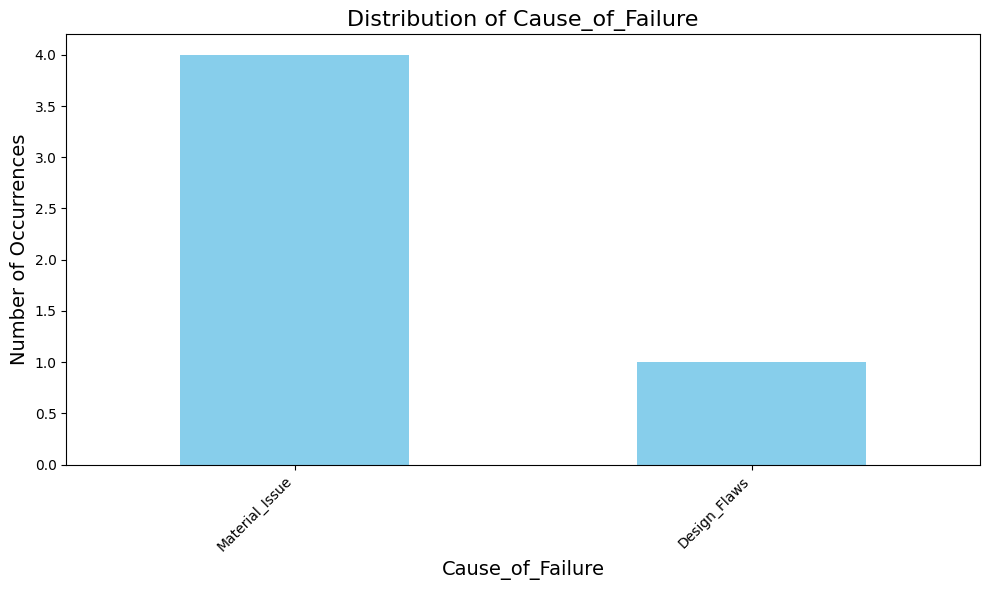

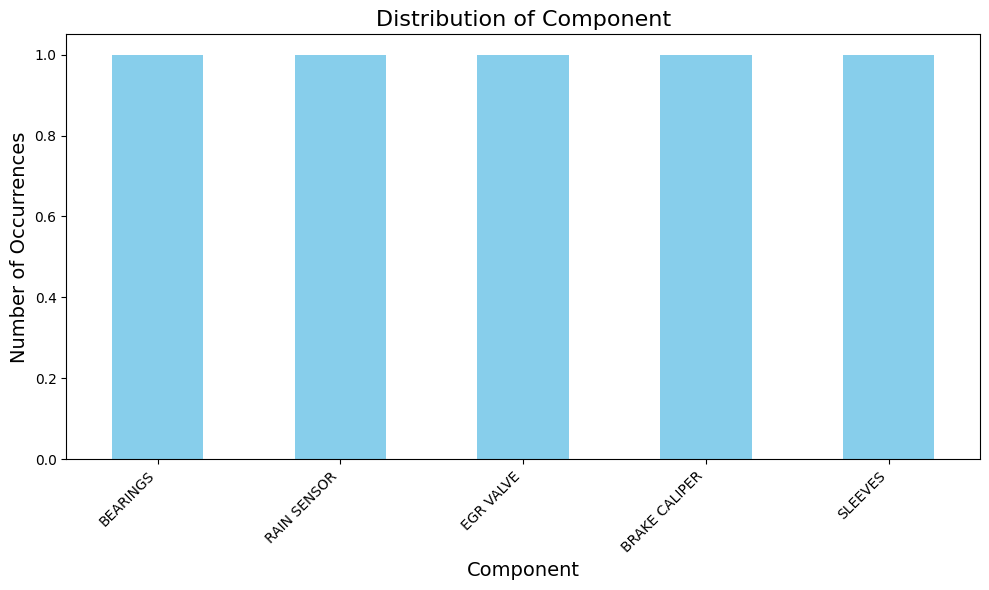

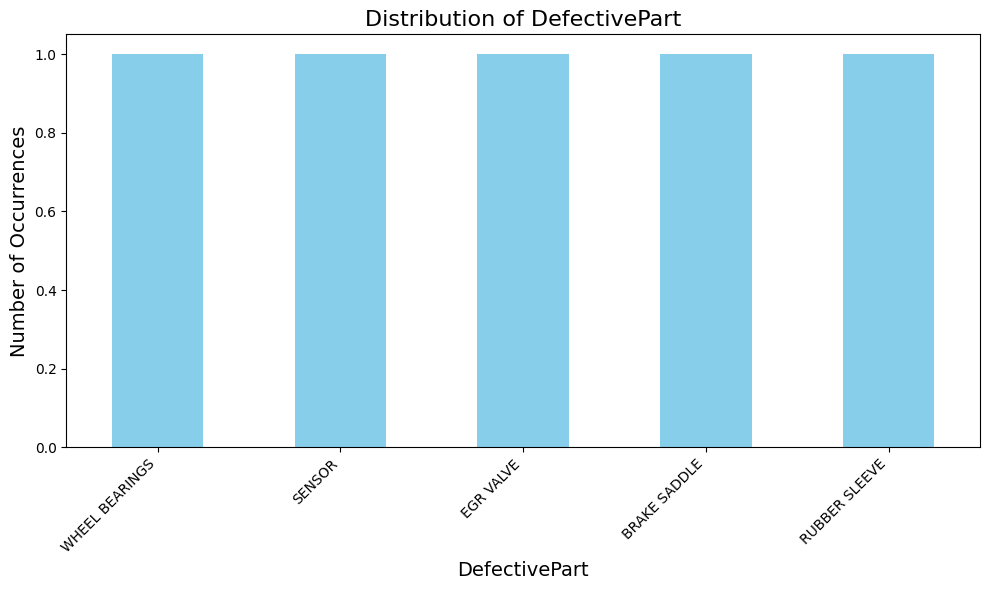

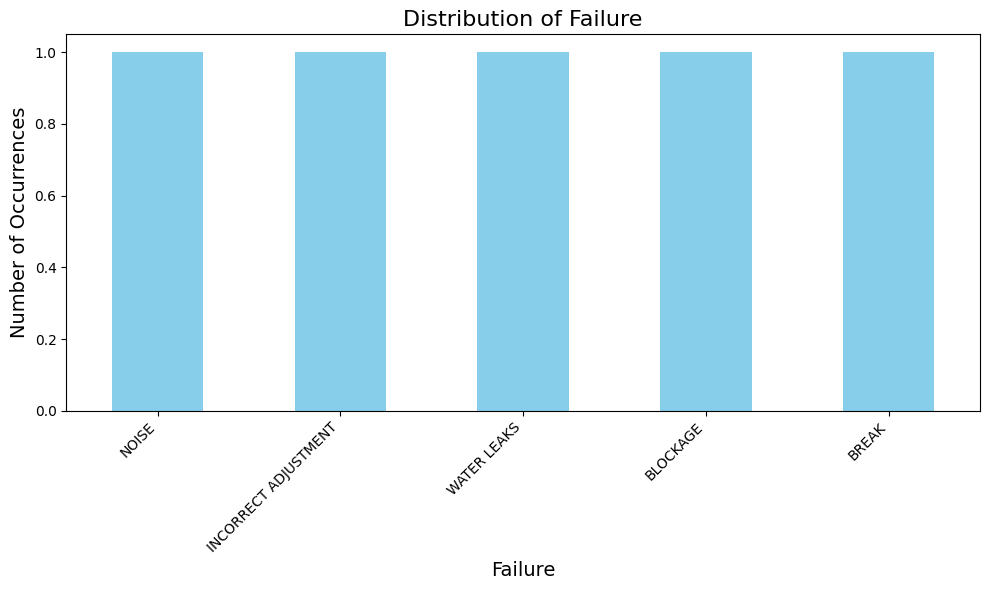

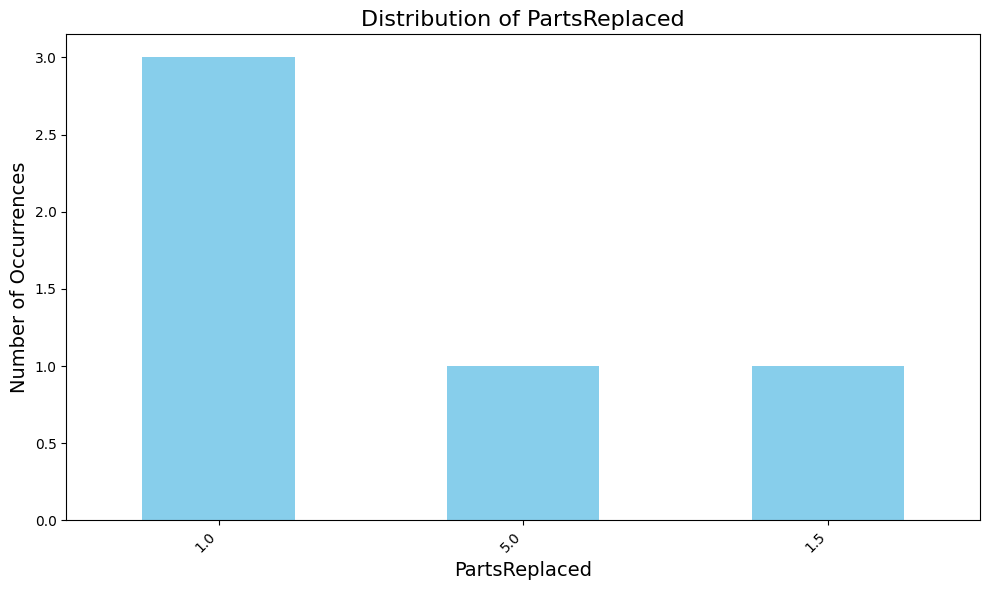

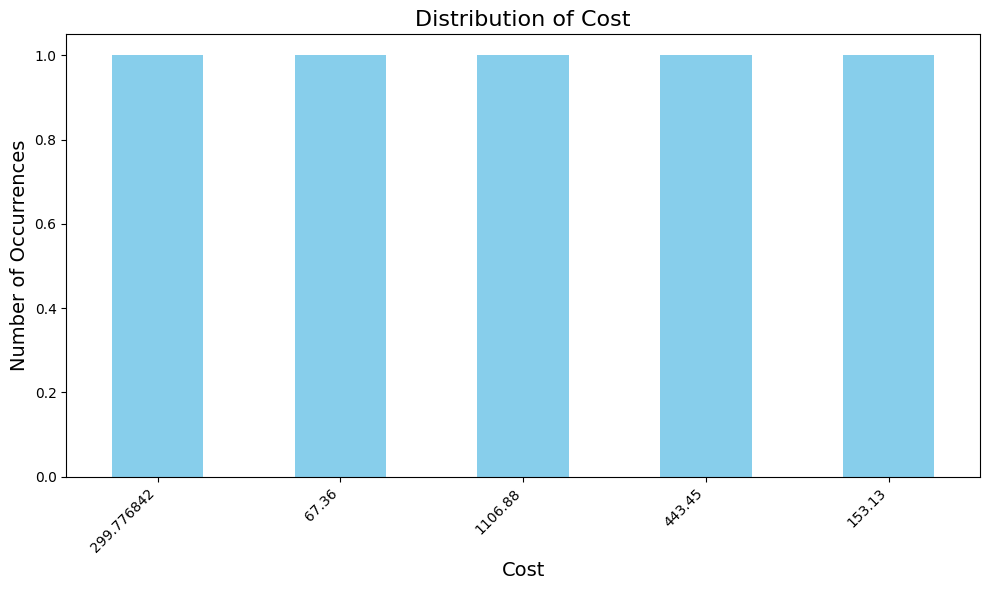

In [30]:
#1. import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load the dataset
file_path = 'cause_of_failure_results.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

#3. List of columns to analyze
analyze = ['Cause_of_Failure','Component', 'DefectivePart', 'Failure', 
                      'PartsReplaced', 'Cost']

#4. Loop through each column and plot its distribution
for column in analyze:
    plt.figure(figsize=(10, 6))
    # Count occurrences of each value in the column
    value_counts = df[column].value_counts()
    
    # Plot the distribution
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Number of Occurrences', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show each plot
    plt.show()


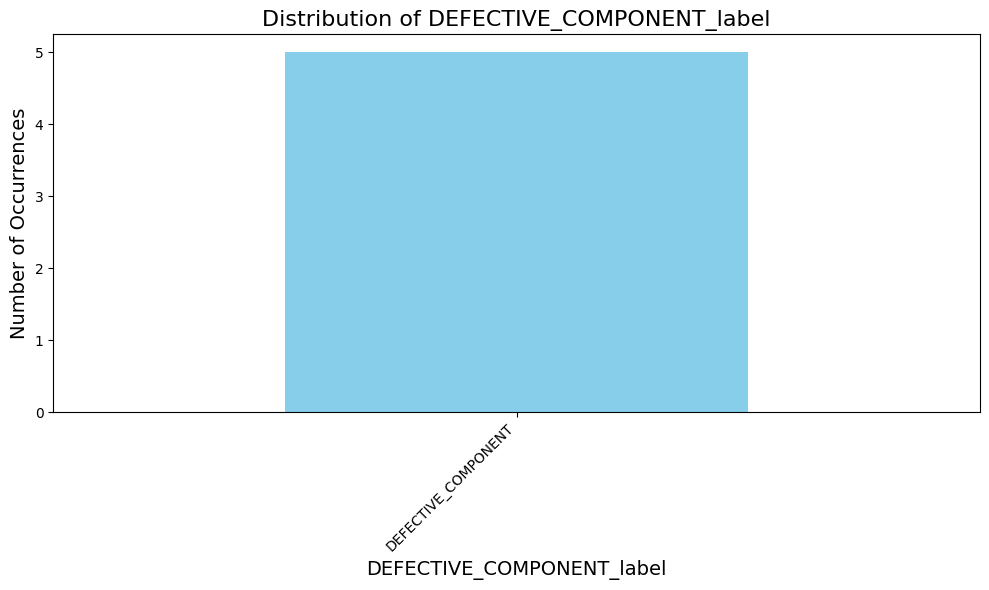

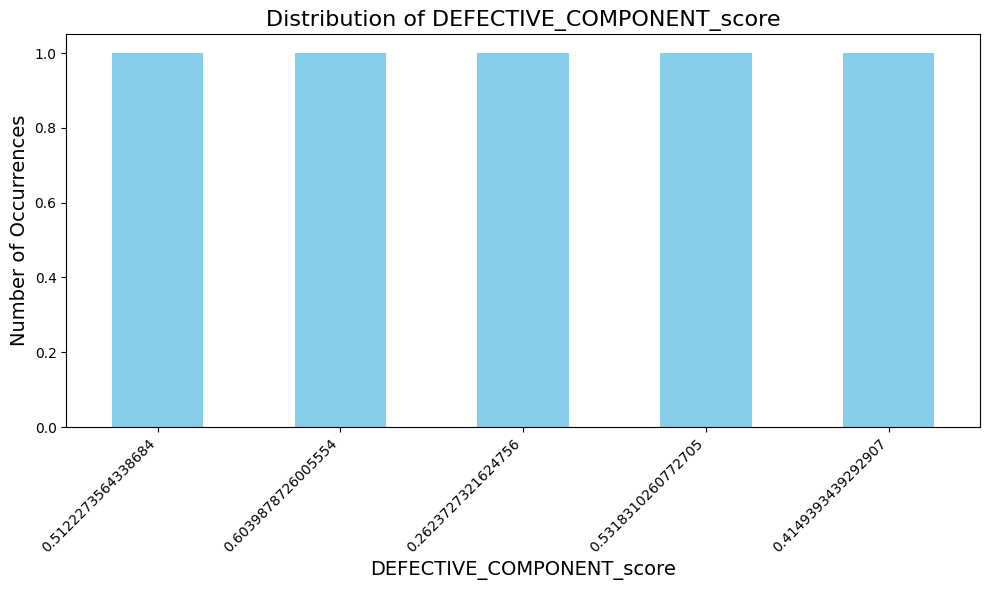

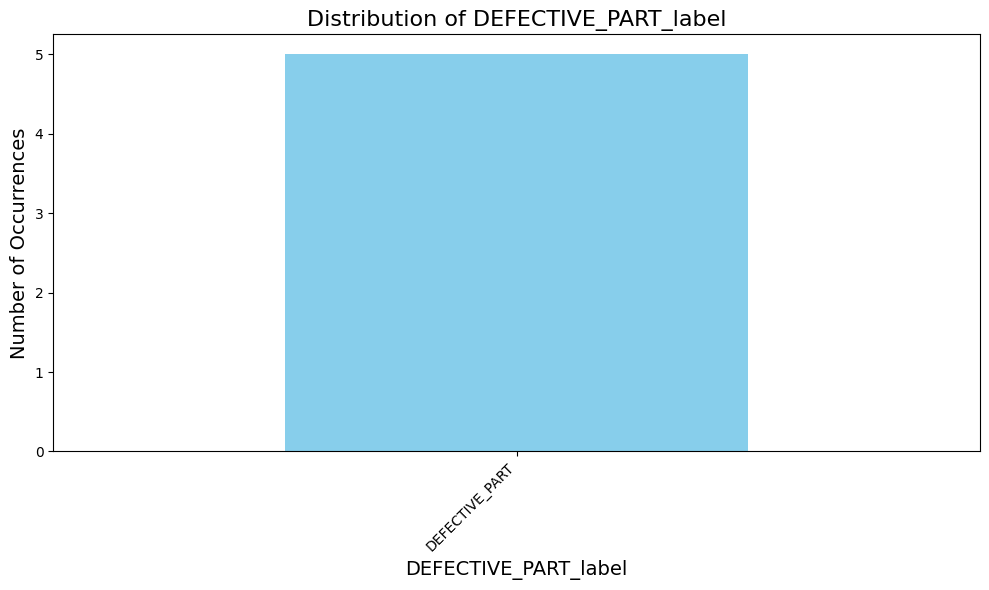

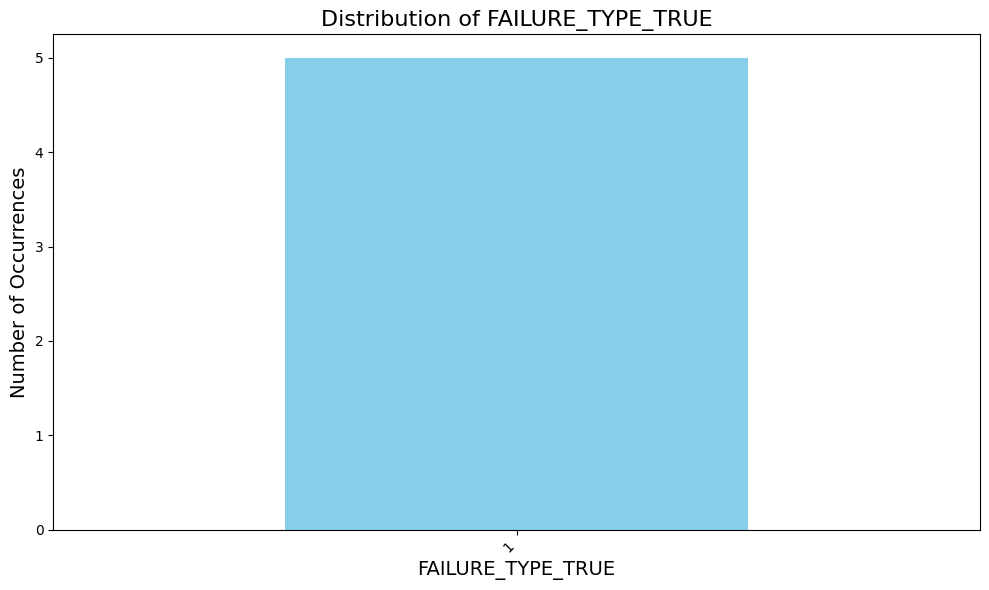

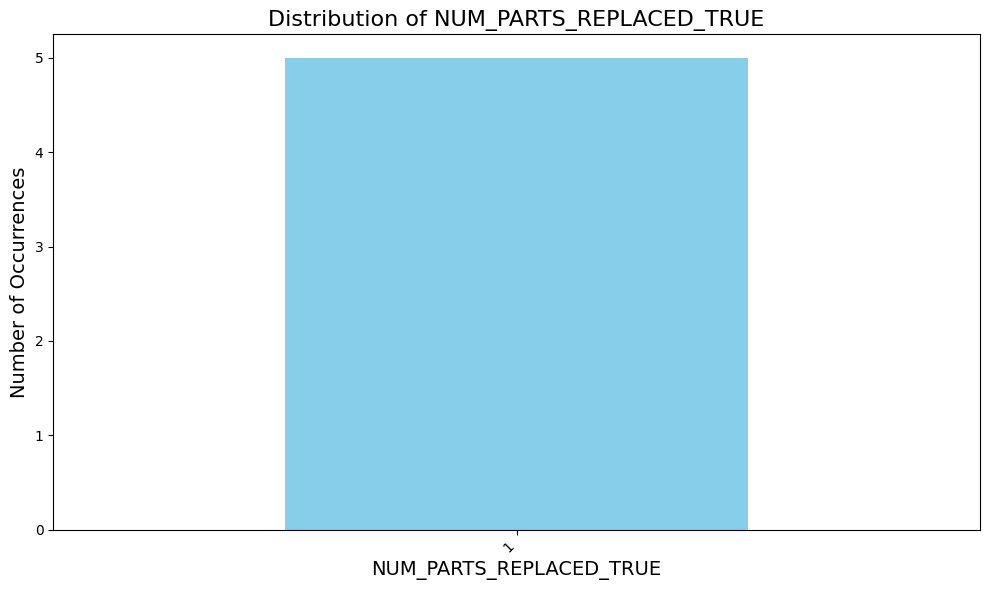

In [31]:
#1. import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load the dataset
file_path = 'extracted_results.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

#3. List of columns to analyze
analyze = ['DEFECTIVE_COMPONENT_label','DEFECTIVE_COMPONENT_score',	'DEFECTIVE_PART_label',	
           'FAILURE_TYPE_TRUE','NUM_PARTS_REPLACED_TRUE']

#4. Loop through each column and plot its distribution
for column in analyze:
    plt.figure(figsize=(10, 6))
    # Count occurrences of each value in the column
    value_counts = df[column].value_counts()
    
    # Plot the distribution
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Number of Occurrences', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show each plot
    plt.show()
